In [3]:
# inspect dataset

In [2]:
!pip install geopandas
!pip install shapely

In [4]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.validation import make_valid
import numpy as np
import matplotlib.pyplot as plt

### Inspecting Allegheny County census tract file for future validation purposes. 

Data taken from WPRDC should show all Census Tracts in year 2016. Result: there should be 402 rows in our final data set. 

In [7]:
alCoCTs = pd.read_csv('AlleghenyCountyCensusTracts2016.csv')
print('Number of Census Tracts: ', len(alCoCTs))
alCoCTs.sort_values('geoid')

Number of Census Tracts:  402


,_id,fid,state_fp,county_fp,tract_ce,affgeoid,geoid,name,lsad,a_land,a_water,shape_length,shape_area
69,15019,70,42,3,10300,1400000US42003010300,42003010300,103.0,CT,866087,235982,0.055235,0.000117
368,15318,369,42,3,20100,1400000US42003020100,42003020100,201.0,CT,1678102,483177,0.083161,0.000231
28,14978,29,42,3,20300,1400000US42003020300,42003020300,203.0,CT,1594790,326537,0.077032,0.000204
70,15020,71,42,3,30500,1400000US42003030500,42003030500,305.0,CT,668309,0,0.046956,0.000072
394,15344,395,42,3,40200,1400000US42003040200,42003040200,402.0,CT,604717,0,0.049916,0.000064
...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,15162,213,42,3,981000,1400000US42003981000,42003981000,9810.0,CT,1372534,0,0.063284,0.000147
80,15030,81,42,3,981100,1400000US42003981100,42003981100,9811.0,CT,875989,0,0.043523,0.000093
68,15018,69,42,3,981200,1400000US42003981200,42003981200,9812.0,CT,460275,156913,0.037880,0.000067
165,15115,166,42,3,981800,1400000US42003981800,42003981800,9818.0,CT,1822889,310071,0.066922,0.000228


In [9]:
cities2019 = pd.read_csv("500_Cities__Census_Tract-level_Data__GIS_Friendly_Format___2019_release_20250405.csv")
cities2019=cities2019[cities2019['PlaceName'] == 'Pittsburgh']
cities2019['Year'] = ['2019']*len(cities2019)

cities2018 = pd.read_csv("500_Cities__Census_Tract-level_Data__GIS_Friendly_Format___2018_release_20250416.csv")
cities2018=cities2018[cities2018['PlaceName'] == 'Pittsburgh']
cities2018['Year'] = ['2018']*len(cities2018)

cities2017 = pd.read_csv("500_Cities__Census_Tract-level_Data__GIS_Friendly_Format___2017_release_20250416.csv")
cities2017=cities2017[cities2017['PlaceName'] == 'Pittsburgh']
cities2017['Year'] = ['2017']*len(cities2017)

cities2016 = pd.read_csv("500_Cities__Census_Tract-level_Data__GIS_Friendly_Format___2016_release_20250416.csv")
cities2016=cities2016[cities2016['PlaceName'] == 'Pittsburgh']
cities2016['Year'] = ['2016']*len(cities2016)

cond_prevn = pd.concat([cities2019, cities2018, cities2017, cities2016])
cond_prevn

,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ARTHRITIS_CrudePrev,ARTHRITIS_Crude95CI,...,PHLTH_Crude95CI,SLEEP_CrudePrev,SLEEP_Crude95CI,STROKE_CrudePrev,STROKE_Crude95CI,TEETHLOST_CrudePrev,TEETHLOST_Crude95CI,Geolocation,Year,population_count
450,PA,Pittsburgh,4261000,42003010300,4261000-42003010300,6600.0,12.9,"(10.2, 16.9)",11.5,"(10.9, 12.3)",...,"( 8.8, 11.8)",42.3,"(39.5, 44.4)",1.6,"( 1.5, 1.8)",24.3,"(19.1, 30.4)","(40.43572601140, -79.9851241394)",2019,NaN
451,PA,Pittsburgh,4261000,42003020100,4261000-42003020100,3629.0,6.7,"( 5.5, 8.5)",17.7,"(17.0, 18.4)",...,"( 7.2, 8.7)",35.9,"(34.0, 37.8)",1.9,"( 1.8, 2.1)",11.0,"( 8.4, 13.8)","(40.44068353060, -80.0000351595)",2019,NaN
452,PA,Pittsburgh,4261000,42003020300,4261000-42003020300,616.0,4.8,"( 4.1, 5.8)",16.8,"(16.2, 17.5)",...,"( 5.9, 7.2)",34.6,"(33.4, 36.1)",1.4,"( 1.3, 1.5)",5.3,"( 4.0, 7.5)","(40.45425423370, -79.9814998549)",2019,NaN
453,PA,Pittsburgh,4261000,42003030500,4261000-42003030500,2256.0,14.4,"(11.9, 17.2)",35.6,"(34.1, 37.0)",...,"(16.8, 20.8)",47.5,"(45.9, 49.0)",7.1,"( 6.2, 8.1)",30.2,"(21.5, 39.5)","(40.44273346300, -79.9837719110)",2019,NaN
454,PA,Pittsburgh,4261000,42003040200,4261000-42003040200,2604.0,11.8,"( 8.8, 15.8)",16.5,"(15.7, 17.4)",...,"( 9.8, 13.4)",41.2,"(37.8, 44.0)",2.8,"( 2.5, 3.0)",27.7,"(19.6, 36.3)","(40.44011022030, -79.9663476233)",2019,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21696,PA,Pittsburgh,4261000,42003562800,4261000-42003562800,1597.0,13.3,"(11.4, 15.2)",31.8,"(30.8, 32.9)",...,"(11.7, 14.0)",38.2,"(36.9, 39.4)",3.4,"( 3.0, 3.8)",16.7,"(12.0, 22.5)","(40.4226894882, -80.0713440743)",2016,NaN
21700,PA,Pittsburgh,4261000,42003310300,4261000-42003310300,990.0,9.5,"( 7.7, 11.3)",31.8,"(30.4, 33.2)",...,"( 9.8, 12.5)",36.3,"(34.6, 37.9)",3.1,"( 2.7, 3.4)",12.8,"( 8.7, 17.6)","(40.3879203774, -79.9225535388)",2016,NaN
21701,PA,Pittsburgh,4261000,42003050900,4261000-42003050900,1202.0,36.3,"(30.9, 42.0)",39.1,"(38.0, 40.4)",...,"(23.7, 28.2)",53.9,"(51.9, 55.5)",8.7,"( 7.8, 9.7)",45.2,"(36.4, 54.4)","(40.4510464389, -79.9743932785)",2016,NaN
21702,PA,Pittsburgh,4261000,42003070600,4261000-42003070600,2082.0,7.5,"( 6.3, 9.2)",17.1,"(16.6, 17.7)",...,"( 5.4, 6.4)",32.5,"(31.2, 33.9)",1.4,"( 1.3, 1.5)",7.1,"( 5.2, 10.0)","(40.4532703527, -79.9254775124)",2016,NaN


In [10]:
cond_prevn = cond_prevn.rename(columns={'TractFIPS': 'Geo_FIPS'})
#Removing unrelated prevalence columns (not comorbidities with Asthma)
def drop_columns_with_keyword(df, keyword):
    # Identify columns containing the keyword (95CI)
    cols_to_drop = [col for col in df.columns if keyword.lower() in col.lower()]
    # Drop them and return the updated DataFrame
    return df.drop(columns=cols_to_drop)
cond_prevn = drop_columns_with_keyword(cond_prevn,'95CI')
cond_prevn = cond_prevn.drop([
    'ARTHRITIS_CrudePrev',
    'BINGE_CrudePrev',
    'CANCER_CrudePrev',
    'COLON_SCREEN_CrudePrev',
    'DENTAL_CrudePrev',
    'KIDNEY_CrudePrev',
    'LPA_CrudePrev',
    'MAMMOUSE_CrudePrev',
    'MHLTH_CrudePrev',
    'PAPTEST_CrudePrev',
    'PHLTH_CrudePrev',
    'SLEEP_CrudePrev',
    'STROKE_CrudePrev',
    'TEETHLOST_CrudePrev'], axis=1)
cond_prevn['lat'] = cond_prevn['Geolocation'].str[1:15]
cond_prevn['lon'] = cond_prevn['Geolocation'].str[-15:-1]
cond_prevn

,StateAbbr,PlaceName,PlaceFIPS,Geo_FIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CASTHMA_CrudePrev,...,COREW_CrudePrev,CSMOKING_CrudePrev,DIABETES_CrudePrev,HIGHCHOL_CrudePrev,OBESITY_CrudePrev,Geolocation,Year,population_count,lat,lon
450,PA,Pittsburgh,4261000,42003010300,4261000-42003010300,6600.0,12.9,19.0,51.9,11.1,...,30.5,26.5,5.0,17.6,29.8,"(40.43572601140, -79.9851241394)",2019,NaN,40.43572601140,-79.9851241394
451,PA,Pittsburgh,4261000,42003020100,4261000-42003020100,3629.0,6.7,22.1,71.8,9.3,...,40.9,14.4,6.4,24.9,23.4,"(40.44068353060, -80.0000351595)",2019,NaN,40.44068353060,-80.0000351595
452,PA,Pittsburgh,4261000,42003020300,4261000-42003020300,616.0,4.8,19.7,67.6,8.2,...,46.1,12.3,4.9,24.2,23.4,"(40.45425423370, -79.9814998549)",2019,NaN,40.45425423370,-79.9814998549
453,PA,Pittsburgh,4261000,42003030500,4261000-42003030500,2256.0,14.4,48.3,84.3,12.8,...,28.4,26.9,20.5,37.2,42.6,"(40.44273346300, -79.9837719110)",2019,NaN,40.44273346300,-79.9837719110
454,PA,Pittsburgh,4261000,42003040200,4261000-42003040200,2604.0,11.8,23.3,67.1,11.7,...,28.0,22.3,8.0,22.3,29.3,"(40.44011022030, -79.9663476233)",2019,NaN,40.44011022030,-79.9663476233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21696,PA,Pittsburgh,4261000,42003562800,4261000-42003562800,1597.0,13.3,30.2,80.5,10.1,...,26.5,23.6,10.5,34.7,30.4,"(40.4226894882, -80.0713440743)",2016,NaN,"40.4226894882,",-80.0713440743
21700,PA,Pittsburgh,4261000,42003310300,4261000-42003310300,990.0,9.5,30.9,81.3,9.4,...,31.1,19.5,10.1,35.5,28.8,"(40.3879203774, -79.9225535388)",2016,NaN,"40.3879203774,",-79.9225535388
21701,PA,Pittsburgh,4261000,42003050900,4261000-42003050900,1202.0,36.3,47.8,83.4,16.9,...,12.3,37.1,23.7,37.6,51.3,"(40.4510464389, -79.9743932785)",2016,NaN,"40.4510464389,",-79.9743932785
21702,PA,Pittsburgh,4261000,42003070600,4261000-42003070600,2082.0,7.5,19.8,70.8,8.3,...,32.0,12.8,4.7,26.5,20.7,"(40.4532703527, -79.9254775124)",2016,NaN,"40.4532703527,",-79.9254775124


In [11]:
cond_prevn.shape
cond_prevn.isna().sum()

StateAbbr                 0
PlaceName                 0
PlaceFIPS                 0
Geo_FIPS                  0
Place_TractID             0
Population2010          127
ACCESS2_CrudePrev         0
BPHIGH_CrudePrev          0
BPMED_CrudePrev           0
CASTHMA_CrudePrev         0
CHD_CrudePrev             0
CHECKUP_CrudePrev         0
CHOLSCREEN_CrudePrev      0
COPD_CrudePrev            0
COREM_CrudePrev           0
COREW_CrudePrev           8
CSMOKING_CrudePrev        0
DIABETES_CrudePrev        0
HIGHCHOL_CrudePrev        0
OBESITY_CrudePrev         0
Geolocation               0
Year                      0
population_count        381
lat                       0
lon                       0
dtype: int64

In [15]:
cond_prevn[cond_prevn['Population2010'].isna()]

,StateAbbr,PlaceName,PlaceFIPS,Geo_FIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CASTHMA_CrudePrev,...,COREW_CrudePrev,CSMOKING_CrudePrev,DIABETES_CrudePrev,HIGHCHOL_CrudePrev,OBESITY_CrudePrev,Geolocation,Year,population_count,lat,lon
21552,PA,Pittsburgh,4261000,42003010300,4261000-42003010300,NaN,14.4,17.1,54.3,10.7,...,20.7,23.2,4.4,20.3,29.1,"(40.43572601140, -79.9851241394)",2017,6600.0,40.43572601140,-79.9851241394
21553,PA,Pittsburgh,4261000,42003020100,4261000-42003020100,NaN,9.0,23.2,74.0,9.6,...,26.8,15.5,7.0,29.4,26.5,"(40.44068353060, -80.0000351595)",2017,3629.0,40.44068353060,-80.0000351595
21554,PA,Pittsburgh,4261000,42003020300,4261000-42003020300,NaN,5.3,20.0,70.2,8.0,...,31.4,11.0,5.0,26.9,25.4,"(40.45425423370, -79.9814998549)",2017,616.0,40.45425423370,-79.9814998549
21555,PA,Pittsburgh,4261000,42003030500,4261000-42003030500,NaN,19.0,49.8,85.3,12.9,...,17.2,25.9,21.9,42.6,45.9,"(40.44273346300, -79.9837719110)",2017,2256.0,40.44273346300,-79.9837719110
21556,PA,Pittsburgh,4261000,42003040200,4261000-42003040200,NaN,16.2,23.1,69.2,12.0,...,18.2,21.8,8.0,26.9,30.4,"(40.44011022030, -79.9663476233)",2017,2604.0,40.44011022030,-79.9663476233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21674,PA,Pittsburgh,4261000,42003563200,4261000-42003563200,NaN,13.9,34.9,78.1,10.4,...,21.4,23.3,12.1,37.7,36.9,"(40.45292913280, -79.9979302476)",2017,2439.0,40.45292913280,-79.9979302476
21675,PA,Pittsburgh,4261000,42003980000,4261000-42003980000,NaN,6.4,25.1,76.0,8.0,...,30.0,12.8,6.8,32.3,25.6,"(40.48825403280, -79.8924052803)",2017,540.0,40.48825403280,-79.8924052803
21676,PA,Pittsburgh,4261000,42003980900,4261000-42003980900,NaN,22.6,29.8,62.2,8.5,...,NaN,34.0,8.7,29.6,42.3,"(40.46654148170, -80.0419472659)",2017,1797.0,40.46654148170,-80.0419472659
21677,PA,Pittsburgh,4261000,42003981800,4261000-42003981800,NaN,22.3,49.4,86.0,10.1,...,13.7,20.1,21.2,49.3,34.5,"(40.48038259110, -79.8972205116)",2017,461.0,40.48038259110,-79.8972205116


In [17]:
cond_prevn = cond_prevn.drop(columns = ['Population2010', 'population_count'])
cond_prevn.isna().sum()

StateAbbr               0
PlaceName               0
PlaceFIPS               0
Geo_FIPS                0
Place_TractID           0
ACCESS2_CrudePrev       0
BPHIGH_CrudePrev        0
BPMED_CrudePrev         0
CASTHMA_CrudePrev       0
CHD_CrudePrev           0
CHECKUP_CrudePrev       0
CHOLSCREEN_CrudePrev    0
COPD_CrudePrev          0
COREM_CrudePrev         0
COREW_CrudePrev         8
CSMOKING_CrudePrev      0
DIABETES_CrudePrev      0
HIGHCHOL_CrudePrev      0
OBESITY_CrudePrev       0
Geolocation             0
Year                    0
lat                     0
lon                     0
dtype: int64

### Issue: There are 275 Allegheny Cenus Tracts that are not in CDC prevelance data

Dropping all non City of Pittsburgh CTs would leave us with 125 rows

In [20]:
testMerge = alCoCTs.merge(cond_prevn, how='inner', left_on='geoid', right_on='Geo_FIPS', validate='one_to_many')
testMerge.isna().sum()

_id                     0
fid                     0
state_fp                0
county_fp               0
tract_ce                0
affgeoid                0
geoid                   0
name                    0
lsad                    0
a_land                  0
a_water                 0
shape_length            0
shape_area              0
StateAbbr               0
PlaceName               0
PlaceFIPS               0
Geo_FIPS                0
Place_TractID           0
ACCESS2_CrudePrev       0
BPHIGH_CrudePrev        0
BPMED_CrudePrev         0
CASTHMA_CrudePrev       0
CHD_CrudePrev           0
CHECKUP_CrudePrev       0
CHOLSCREEN_CrudePrev    0
COPD_CrudePrev          0
COREM_CrudePrev         0
COREW_CrudePrev         8
CSMOKING_CrudePrev      0
DIABETES_CrudePrev      0
HIGHCHOL_CrudePrev      0
OBESITY_CrudePrev       0
Geolocation             0
Year                    0
lat                     0
lon                     0
dtype: int64

In [22]:
prevelence_data = cond_prevn
print(prevelence_data.isna().sum())
prevelence_data = prevelence_data.drop(columns=["COREW_CrudePrev"])
print('\nDropping Column with NAs\n')
print(prevelence_data.isna().sum())
print(len(prevelence_data)/4)
prevelence_data

StateAbbr               0
PlaceName               0
PlaceFIPS               0
Geo_FIPS                0
Place_TractID           0
ACCESS2_CrudePrev       0
BPHIGH_CrudePrev        0
BPMED_CrudePrev         0
CASTHMA_CrudePrev       0
CHD_CrudePrev           0
CHECKUP_CrudePrev       0
CHOLSCREEN_CrudePrev    0
COPD_CrudePrev          0
COREM_CrudePrev         0
COREW_CrudePrev         8
CSMOKING_CrudePrev      0
DIABETES_CrudePrev      0
HIGHCHOL_CrudePrev      0
OBESITY_CrudePrev       0
Geolocation             0
Year                    0
lat                     0
lon                     0
dtype: int64

Dropping Column with NAs

StateAbbr               0
PlaceName               0
PlaceFIPS               0
Geo_FIPS                0
Place_TractID           0
ACCESS2_CrudePrev       0
BPHIGH_CrudePrev        0
BPMED_CrudePrev         0
CASTHMA_CrudePrev       0
CHD_CrudePrev           0
CHECKUP_CrudePrev       0
CHOLSCREEN_CrudePrev    0
COPD_CrudePrev          0
COREM_CrudePrev         

,StateAbbr,PlaceName,PlaceFIPS,Geo_FIPS,Place_TractID,ACCESS2_CrudePrev,BPHIGH_CrudePrev,BPMED_CrudePrev,CASTHMA_CrudePrev,CHD_CrudePrev,...,COPD_CrudePrev,COREM_CrudePrev,CSMOKING_CrudePrev,DIABETES_CrudePrev,HIGHCHOL_CrudePrev,OBESITY_CrudePrev,Geolocation,Year,lat,lon
450,PA,Pittsburgh,4261000,42003010300,4261000-42003010300,12.9,19.0,51.9,11.1,2.6,...,4.4,38.8,26.5,5.0,17.6,29.8,"(40.43572601140, -79.9851241394)",2019,40.43572601140,-79.9851241394
451,PA,Pittsburgh,4261000,42003020100,4261000-42003020100,6.7,22.1,71.8,9.3,3.9,...,3.8,50.2,14.4,6.4,24.9,23.4,"(40.44068353060, -80.0000351595)",2019,40.44068353060,-80.0000351595
452,PA,Pittsburgh,4261000,42003020300,4261000-42003020300,4.8,19.7,67.6,8.2,2.8,...,2.8,54.3,12.3,4.9,24.2,23.4,"(40.45425423370, -79.9814998549)",2019,40.45425423370,-79.9814998549
453,PA,Pittsburgh,4261000,42003030500,4261000-42003030500,14.4,48.3,84.3,12.8,9.9,...,10.6,32.5,26.9,20.5,37.2,42.6,"(40.44273346300, -79.9837719110)",2019,40.44273346300,-79.9837719110
454,PA,Pittsburgh,4261000,42003040200,4261000-42003040200,11.8,23.3,67.1,11.7,4.0,...,5.5,31.8,22.3,8.0,22.3,29.3,"(40.44011022030, -79.9663476233)",2019,40.44011022030,-79.9663476233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21696,PA,Pittsburgh,4261000,42003562800,4261000-42003562800,13.3,30.2,80.5,10.1,7.6,...,7.7,34.7,23.6,10.5,34.7,30.4,"(40.4226894882, -80.0713440743)",2016,"40.4226894882,",-80.0713440743
21700,PA,Pittsburgh,4261000,42003310300,4261000-42003310300,9.5,30.9,81.3,9.4,7.2,...,6.5,36.8,19.5,10.1,35.5,28.8,"(40.3879203774, -79.9225535388)",2016,"40.3879203774,",-79.9225535388
21701,PA,Pittsburgh,4261000,42003050900,4261000-42003050900,36.3,47.8,83.4,16.9,10.8,...,14.3,19.9,37.1,23.7,37.6,51.3,"(40.4510464389, -79.9743932785)",2016,"40.4510464389,",-79.9743932785
21702,PA,Pittsburgh,4261000,42003070600,4261000-42003070600,7.5,19.8,70.8,8.3,3.4,...,2.9,40.0,12.8,4.7,26.5,20.7,"(40.4532703527, -79.9254775124)",2016,"40.4532703527,",-79.9254775124


In [24]:
testMerge.dropna().shape

(500, 36)

### Utlization Data

Kinda did some sketchy stuff to join this. Pretty much summing treats NAs as 0. Missing 6 Census Tracts for some reason.

In [27]:
ER_use = pd.read_csv("Allegheny_county_ER_use.csv")
ER_use.head()

,_id,Geo_FIPS,StateFIPS,CountyFIPS,TractFIPS,BlockgroupFIPS,TotalPopEst2015_19ACS,YearOfStartDate,UnderAge1PopEst2015_19ACS,Age0to17PopEst2015_19ACS,...,ED_VisitsPer100Age0to17,NumberLowAcuityED_VisitsAge0to17,LowAcuityED_VisitsPer100Age0to17,NumberAsthmaRelatedED_Visits,AsthmaRelatedED_VisitsPer100Age0to17,NumberED_VisitsByChildrenUnder1YearOld,NumberOfInjuryRelatedVisits,InjuryRelatedEDVisitsPer100Age0to17,NumberAcuteRespiratoryTractInfectionRelatedED_VisitsAge0to17,AcuteRespiratoryTractInfectionRelatedED_VisitsPer100Age0to17
0,1,420031301002,42,3,130100,2,518,2016.0,9.4,207,...,58.9,62.0,30.0,40.0,19.3,14.0,1.0,0.5,18.0,8.7
1,2,420031301002,42,3,130100,2,518,2017.0,9.4,207,...,62.8,80.0,38.6,54.0,26.1,11.0,1.0,0.5,27.0,13.0
2,3,420031301002,42,3,130100,2,518,2018.0,9.4,207,...,66.7,85.0,41.1,59.0,28.5,13.0,2.0,1.0,19.0,9.2
3,4,420031301002,42,3,130100,2,518,2019.0,9.4,207,...,71.5,96.0,46.4,68.0,32.9,7.0,NaN,0.0,27.0,13.0
4,5,420031301003,42,3,130100,3,489,2016.0,0.0,134,...,53.0,39.0,29.1,13.0,9.7,12.0,2.0,1.5,10.0,7.5


In [29]:
ER_use.shape

(4370, 23)

In [31]:
PC_use = pd.read_csv("Allegheny_county_PC_use.csv")
PC_use = PC_use.fillna(0)

In [33]:
PC_use.shape

(4366, 14)

In [35]:
#merging utilization data for Asthma ER and primary care
util_data = PC_use.merge(ER_use, how = 'left', left_on = ['Geo_FIPS', 'YearOfContactDate'], right_on = ['Geo_FIPS', 'YearOfStartDate'], validate='one_to_one')
#dropping repeat columns
util_data = util_data.drop(["_id_y","StateFIPS_y","CountyFIPS_y","TractFIPS_y","BlockgroupFIPS_y",
                            "TotalPopEst2015_19ACS_y","Age0to17PopEst2015_19ACS_y"],axis="columns")
util_data

,_id_x,Geo_FIPS,StateFIPS_x,CountyFIPS_x,TractFIPS_x,BlockgroupFIPS_x,TotalPopEst2015_19ACS_x,Age0to17PopEst2015_19ACS_x,YearOfContactDate,AllPrimaryCarePatientsAge0to17,...,ED_VisitsPer100Age0to17,NumberLowAcuityED_VisitsAge0to17,LowAcuityED_VisitsPer100Age0to17,NumberAsthmaRelatedED_Visits,AsthmaRelatedED_VisitsPer100Age0to17,NumberED_VisitsByChildrenUnder1YearOld,NumberOfInjuryRelatedVisits,InjuryRelatedEDVisitsPer100Age0to17,NumberAcuteRespiratoryTractInfectionRelatedED_VisitsAge0to17,AcuteRespiratoryTractInfectionRelatedED_VisitsPer100Age0to17
0,1,420031301002,42,3,130100,2,518,207,2016,82,...,58.9,62.0,30.0,40.0,19.3,14.0,1.0,0.5,18.0,8.7
1,2,420031301002,42,3,130100,2,518,207,2017,94,...,62.8,80.0,38.6,54.0,26.1,11.0,1.0,0.5,27.0,13.0
2,3,420031301002,42,3,130100,2,518,207,2018,89,...,66.7,85.0,41.1,59.0,28.5,13.0,2.0,1.0,19.0,9.2
3,4,420031301002,42,3,130100,2,518,207,2019,86,...,71.5,96.0,46.4,68.0,32.9,7.0,NaN,0.0,27.0,13.0
4,5,420031301003,42,3,130100,3,489,134,2016,53,...,53.0,39.0,29.1,13.0,9.7,12.0,2.0,1.5,10.0,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4361,4362,420039818001,42,3,981800,1,207,47,2019,4,...,17.0,2.0,4.3,NaN,0.0,NaN,NaN,0.0,NaN,0.0
4362,4363,420039822001,42,3,982200,1,4618,80,2016,16,...,12.5,2.0,2.5,NaN,0.0,1.0,NaN,0.0,NaN,0.0
4363,4364,420039822001,42,3,982200,1,4618,80,2017,18,...,12.5,2.0,2.5,1.0,1.3,1.0,NaN,0.0,3.0,3.8
4364,4365,420039822001,42,3,982200,1,4618,80,2018,19,...,11.3,2.0,2.5,NaN,0.0,2.0,NaN,0.0,3.0,3.8


In [37]:
#Joining rows based on CTs
#Dropping Per100 columns
util_data = drop_columns_with_keyword(util_data,'Per100')
util_data['Geo_FIPS'] = util_data['Geo_FIPS'].apply(str)
util_data['Geo_FIPS'] = util_data['Geo_FIPS'].str[:-1]
util_data = util_data.drop(columns=['_id_x', 'StateFIPS_x', 'CountyFIPS_x', 'TractFIPS_x', 'BlockgroupFIPS_x'])
util_data = util_data.groupby(['Geo_FIPS', 'YearOfContactDate'], as_index=False).sum()
util_data.isna().sum()

Geo_FIPS                                                        0
YearOfContactDate                                               0
TotalPopEst2015_19ACS_x                                         0
Age0to17PopEst2015_19ACS_x                                      0
AllPrimaryCarePatientsAge0to17                                  0
WellChildVisitsInPastYearAge0to17                               0
AsthmaDiagnosisAge0to17                                         0
YearOfStartDate                                                 0
UnderAge1PopEst2015_19ACS                                       0
Unique0to17WithED_Visit                                         0
NumberED_VisitsAge0to17                                         0
NumberLowAcuityED_VisitsAge0to17                                0
NumberAsthmaRelatedED_Visits                                    0
NumberED_VisitsByChildrenUnder1YearOld                          0
NumberOfInjuryRelatedVisits                                     0
NumberAcut

In [39]:
util_data

,Geo_FIPS,YearOfContactDate,TotalPopEst2015_19ACS_x,Age0to17PopEst2015_19ACS_x,AllPrimaryCarePatientsAge0to17,WellChildVisitsInPastYearAge0to17,AsthmaDiagnosisAge0to17,YearOfStartDate,UnderAge1PopEst2015_19ACS,Unique0to17WithED_Visit,NumberED_VisitsAge0to17,NumberLowAcuityED_VisitsAge0to17,NumberAsthmaRelatedED_Visits,NumberED_VisitsByChildrenUnder1YearOld,NumberOfInjuryRelatedVisits,NumberAcuteRespiratoryTractInfectionRelatedED_VisitsAge0to17
0,42003010300,2016,4147,155,50,33,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,42003010300,2017,4147,155,41,24,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,42003010300,2018,4147,155,44,34,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,42003010300,2019,728,122,47,36,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,42003020100,2016,5490,201,71,44,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1580,42003981800,2019,207,47,4,3,2.0,2019.0,0.0,4.0,8.0,2.0,0.0,0.0,0.0,0.0
1581,42003982200,2016,4618,80,16,13,1.0,2016.0,0.0,6.0,10.0,2.0,0.0,1.0,0.0,0.0
1582,42003982200,2017,4618,80,18,16,1.0,2017.0,0.0,10.0,10.0,2.0,1.0,1.0,0.0,3.0
1583,42003982200,2018,4618,80,19,14,1.0,2018.0,0.0,7.0,9.0,2.0,0.0,2.0,0.0,3.0


### Race Data

In [42]:
#loading racial data from 2010 census
Race_data = pd.read_csv("2010_census_race_P9-Data.csv", header = 1)
#removing extra details on multi-racial individuals
Race_data = Race_data.iloc[:,:13]
Race_data['Type'] = Race_data['Geographic Area Name'].apply(lambda x : ' '.join(x.split(' ')[:2]))
Race_data = Race_data[Race_data['Type'] == 'Census Tract']
Race_data

,Geography,Geographic Area Name,Total,Total!!Hispanic or Latino,Total!!Not Hispanic or Latino,Total!!Not Hispanic or Latino!!Population of one race,Total!!Not Hispanic or Latino!!Population of one race!!White alone,Total!!Not Hispanic or Latino!!Population of one race!!Black or African American alone,Total!!Not Hispanic or Latino!!Population of one race!!American Indian and Alaska Native alone,Total!!Not Hispanic or Latino!!Population of one race!!Asian alone,Total!!Not Hispanic or Latino!!Population of one race!!Native Hawaiian and Other Pacific Islander alone,Total!!Not Hispanic or Latino!!Population of one race!!Some Other Race alone,Total!!Not Hispanic or Latino!!Two or More Races,Type
1,1400000US42003010300,"Census Tract 103, Allegheny County, Pennsylvania",6600,161,6439,6362,4260,2004,12,72,2,12,77,Census Tract
2,1400000US42003020100,"Census Tract 201, Allegheny County, Pennsylvania",3629,119,3510,3422,2642,573,8,171,1,27,88,Census Tract
3,1400000US42003020300,"Census Tract 203, Allegheny County, Pennsylvania",616,10,606,595,459,96,1,39,0,0,11,Census Tract
4,1400000US42003030500,"Census Tract 305, Allegheny County, Pennsylvania",2256,32,2224,2179,298,1846,7,24,0,4,45,Census Tract
5,1400000US42003040200,"Census Tract 402, Allegheny County, Pennsylvania",2604,61,2543,2505,1331,997,7,169,0,1,38,Census Tract
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,1400000US42003981000,"Census Tract 9810, Allegheny County, Pennsylvania",4,0,4,4,4,0,0,0,0,0,0,Census Tract
399,1400000US42003981100,"Census Tract 9811, Allegheny County, Pennsylvania",7,0,7,7,6,1,0,0,0,0,0,Census Tract
400,1400000US42003981200,"Census Tract 9812, Allegheny County, Pennsylvania",0,0,0,0,0,0,0,0,0,0,0,Census Tract
401,1400000US42003981800,"Census Tract 9818, Allegheny County, Pennsylvania",461,14,447,436,257,174,3,2,0,0,11,Census Tract


In [44]:
Race_data.shape

(402, 14)

### House Hold Income Data

In [47]:
#loading 5 year HH income data adj to 2016 inflation levels
HHincome_data = pd.read_csv("2016_ad_HHincome.S2503-Data.csv", na_values = ['-'])
#removed data on Housing cost as % of hh income
#HHincome_data = HHincome_data.iloc[:,:-133]
HHincome_data['Type'] = HHincome_data['Geographic Area Name'].apply(lambda x : ' '.join(x.split(' ')[:2]))
HHincome_data = HHincome_data[HHincome_data['Type'] == 'Census Tract']
HHincome_data

,Geography,Geographic Area Name,Occupied housing units!!Estimate!!Occupied housing units,Occupied housing units!!Margin of Error!!Occupied housing units,Owner-occupied housing units!!Estimate!!Occupied housing units,Owner-occupied housing units!!Margin of Error!!Occupied housing units,Renter-occupied housing units!!Estimate!!Occupied housing units,Renter-occupied housing units!!Margin of Error!!Occupied housing units,"Occupied housing units!!Estimate!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!Less than $5,000","Occupied housing units!!Margin of Error!!HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!Less than $5,000",...,Owner-occupied housing units!!Margin of Error!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!Zero or negative income,Renter-occupied housing units!!Estimate!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!Zero or negative income,Renter-occupied housing units!!Margin of Error!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!Zero or negative income,Occupied housing units!!Estimate!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!No cash rent,Occupied housing units!!Margin of Error!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!No cash rent,Owner-occupied housing units!!Estimate!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!No cash rent,Owner-occupied housing units!!Margin of Error!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!No cash rent,Renter-occupied housing units!!Estimate!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!No cash rent,Renter-occupied housing units!!Margin of Error!!MONTHLY HOUSING COSTS AS A PERCENTAGE OF HOUSEHOLD INCOME IN THE PAST 12 MONTHS!!No cash rent,Type
1,1400000US42003010300,"Census Tract 103, Allegheny County, Pennsylvania",281,38,73,31,208,44,4.6,5.1,...,26,2.9,4.3,0.0,7.7,(X),(X),0.0,10.2,Census Tract
2,1400000US42003020100,"Census Tract 201, Allegheny County, Pennsylvania",2042,160,408,116,1634,154,4.8,2.5,...,5.4,2.6,2.1,0.0,1.1,(X),(X),0.0,1.4,Census Tract
3,1400000US42003020300,"Census Tract 203, Allegheny County, Pennsylvania",553,48,86,37,467,57,2.7,3,...,22.7,3.2,3.5,0.0,4,(X),(X),0.0,4.7,Census Tract
4,1400000US42003030500,"Census Tract 305, Allegheny County, Pennsylvania",1117,96,211,51,906,116,8.3,6.1,...,10.1,3.6,4.4,0.0,2,(X),(X),0.0,2.4,Census Tract
5,1400000US42003040200,"Census Tract 402, Allegheny County, Pennsylvania",611,61,182,51,429,69,18.7,8.6,...,11.6,16.6,10,1.5,1.6,(X),(X),2.1,2.2,Census Tract
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,1400000US42003981000,"Census Tract 9810, Allegheny County, Pennsylvania",0,10,0,10,0,10,NaN,**,...,**,NaN,**,NaN,**,(X),(X),NaN,**,Census Tract
399,1400000US42003981100,"Census Tract 9811, Allegheny County, Pennsylvania",5,7,0,10,5,7,0.0,100,...,**,0.0,100,0.0,100,(X),(X),0.0,100,Census Tract
400,1400000US42003981200,"Census Tract 9812, Allegheny County, Pennsylvania",0,10,0,10,0,10,NaN,**,...,**,NaN,**,NaN,**,(X),(X),NaN,**,Census Tract
401,1400000US42003981800,"Census Tract 9818, Allegheny County, Pennsylvania",17,10,5,7,12,11,0.0,59.8,...,100,0.0,71.2,0.0,59.8,(X),(X),0.0,71.2,Census Tract


In [50]:
HHincome_data = drop_columns_with_keyword(HHincome_data,'Margin of Error')
HHincome_data = drop_columns_with_keyword(HHincome_data,'Owner-occupied')
HHincome_data = drop_columns_with_keyword(HHincome_data,'Renter-occupied')
HHincome_data = HHincome_data.iloc[:,:15]
colsDict = {}
for col in HHincome_data.columns[3:]:
    colsDict[col] = '!!'.join(col.split('!!')[2:4])
HHincome_data = HHincome_data.rename(columns=colsDict)
HHincome_data

,Geography,Geographic Area Name,Occupied housing units!!Estimate!!Occupied housing units,"HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!Less than $5,000","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$5,000 to $9,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$10,000 to $14,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$15,000 to $19,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$20,000 to $24,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$25,000 to $34,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$35,000 to $49,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$50,000 to $74,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$75,000 to $99,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$100,000 to $149,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$150,000 or more",HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars)
1,1400000US42003010300,"Census Tract 103, Allegheny County, Pennsylvania",281,4.6,15.3,2.8,21.4,8.5,5.0,14.2,19.6,1.8,4.6,2.1,22292.0
2,1400000US42003020100,"Census Tract 201, Allegheny County, Pennsylvania",2042,4.8,7.3,4.2,4.7,4.6,9.2,5.4,12.3,8.2,13.3,26.1,72642.0
3,1400000US42003020300,"Census Tract 203, Allegheny County, Pennsylvania",553,2.7,0.0,2.5,3.6,2.7,4.0,6.5,16.8,14.6,17.7,28.8,93125.0
4,1400000US42003030500,"Census Tract 305, Allegheny County, Pennsylvania",1117,8.3,15.0,15.0,17.2,7.5,9.3,7.0,11.7,3.8,3.2,1.8,18730.0
5,1400000US42003040200,"Census Tract 402, Allegheny County, Pennsylvania",611,18.7,22.3,6.2,9.2,10.6,5.4,16.9,4.7,3.3,1.3,1.5,16250.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,1400000US42003981000,"Census Tract 9810, Allegheny County, Pennsylvania",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399,1400000US42003981100,"Census Tract 9811, Allegheny County, Pennsylvania",5,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,NaN
400,1400000US42003981200,"Census Tract 9812, Allegheny County, Pennsylvania",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
401,1400000US42003981800,"Census Tract 9818, Allegheny County, Pennsylvania",17,0.0,23.5,0.0,52.9,23.5,0.0,0.0,0.0,0.0,0.0,0.0,18750.0


In [52]:
#Merging census datasets
census_data = Race_data.merge(HHincome_data, how = 'left', left_on = 'Geography', right_on = 'Geography')
#census_data = census_data.drop(index=0)
census_data['Geo_FIPS'] = census_data['Geography'].str[-11:]
#col = census_data.pop('Geo_FIPS')
#census_data.insert(0, 'Geo_FIPS', col)
census_data2016 = census_data.copy()
census_data2016['Year'] = [2016]*len(census_data2016)
census_data2017 = census_data.copy()
census_data2017['Year'] = [2017]*len(census_data2017)
census_data2018 = census_data.copy()
census_data2018['Year'] = [2018]*len(census_data2018)
census_data2019 = census_data.copy()
census_data2019['Year'] = [2019]*len(census_data2019)
census_data=pd.concat([census_data2016, census_data2017, census_data2018, census_data2019], axis =0)
census_data

,Geography,Geographic Area Name_x,Total,Total!!Hispanic or Latino,Total!!Not Hispanic or Latino,Total!!Not Hispanic or Latino!!Population of one race,Total!!Not Hispanic or Latino!!Population of one race!!White alone,Total!!Not Hispanic or Latino!!Population of one race!!Black or African American alone,Total!!Not Hispanic or Latino!!Population of one race!!American Indian and Alaska Native alone,Total!!Not Hispanic or Latino!!Population of one race!!Asian alone,...,"HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$20,000 to $24,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$25,000 to $34,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$35,000 to $49,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$50,000 to $74,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$75,000 to $99,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$100,000 to $149,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$150,000 or more",HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars),Geo_FIPS,Year
0,1400000US42003010300,"Census Tract 103, Allegheny County, Pennsylvania",6600,161,6439,6362,4260,2004,12,72,...,8.5,5.0,14.2,19.6,1.8,4.6,2.1,22292.0,42003010300,2016
1,1400000US42003020100,"Census Tract 201, Allegheny County, Pennsylvania",3629,119,3510,3422,2642,573,8,171,...,4.6,9.2,5.4,12.3,8.2,13.3,26.1,72642.0,42003020100,2016
2,1400000US42003020300,"Census Tract 203, Allegheny County, Pennsylvania",616,10,606,595,459,96,1,39,...,2.7,4.0,6.5,16.8,14.6,17.7,28.8,93125.0,42003020300,2016
3,1400000US42003030500,"Census Tract 305, Allegheny County, Pennsylvania",2256,32,2224,2179,298,1846,7,24,...,7.5,9.3,7.0,11.7,3.8,3.2,1.8,18730.0,42003030500,2016
4,1400000US42003040200,"Census Tract 402, Allegheny County, Pennsylvania",2604,61,2543,2505,1331,997,7,169,...,10.6,5.4,16.9,4.7,3.3,1.3,1.5,16250.0,42003040200,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,1400000US42003981000,"Census Tract 9810, Allegheny County, Pennsylvania",4,0,4,4,4,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42003981000,2019
398,1400000US42003981100,"Census Tract 9811, Allegheny County, Pennsylvania",7,0,7,7,6,1,0,0,...,0.0,0.0,100.0,0.0,0.0,0.0,0.0,NaN,42003981100,2019
399,1400000US42003981200,"Census Tract 9812, Allegheny County, Pennsylvania",0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42003981200,2019
400,1400000US42003981800,"Census Tract 9818, Allegheny County, Pennsylvania",461,14,447,436,257,174,3,2,...,23.5,0.0,0.0,0.0,0.0,0.0,0.0,18750.0,42003981800,2019


In [54]:
census_data.isna().sum()

Geography                                                                                                          0
Geographic Area Name_x                                                                                             0
Total                                                                                                              0
Total!!Hispanic or Latino                                                                                          0
Total!!Not Hispanic or Latino                                                                                      0
Total!!Not Hispanic or Latino!!Population of one race                                                              0
Total!!Not Hispanic or Latino!!Population of one race!!White alone                                                 0
Total!!Not Hispanic or Latino!!Population of one race!!Black or African American alone                             0
Total!!Not Hispanic or Latino!!Population of one race!!American 

In [56]:
#Loading Emissions data
emissions_data = pd.read_csv("Emissions_Data_w_Census_Tracts_Pivot.csv")
# Retaining data from 2016-2019 to align with utilization data
#emissions_data = emissions_data[(emissions_data["year"] <= 2019) & (emissions_data["year"] >= 2016)]

emissions_data = alCoCTs[['geoid', 'tract_ce']].merge(emissions_data, how = 'left', left_on='tract_ce', right_on='TractCE', validate='one_to_many')
emissions_data=emissions_data.fillna(0)

In [58]:
alCoCTs['geoid'].unique

<bound method Series.unique of 0      42003050900
1      42003070300
2      42003120700
3      42003140400
4      42003180700
          ...     
397    42003141000
398    42003202300
399    42003320600
400    42003408001
401    42003414101
Name: geoid, Length: 402, dtype: int64>

## Final Merges

In [61]:
#Merging health care utlization data with census data on race and household income
utilxcensus_data = util_data.merge(census_data, how='right', left_on=['Geo_FIPS','YearOfContactDate'], right_on=['Geo_FIPS','Year'])
utilxcensus_data['Geo_FIPS']=utilxcensus_data['Geo_FIPS'].apply(int)
utilxcensus_data

,Geo_FIPS,YearOfContactDate,TotalPopEst2015_19ACS_x,Age0to17PopEst2015_19ACS_x,AllPrimaryCarePatientsAge0to17,WellChildVisitsInPastYearAge0to17,AsthmaDiagnosisAge0to17,YearOfStartDate,UnderAge1PopEst2015_19ACS,Unique0to17WithED_Visit,...,"HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$15,000 to $19,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$20,000 to $24,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$25,000 to $34,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$35,000 to $49,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$50,000 to $74,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$75,000 to $99,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$100,000 to $149,999","HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!$150,000 or more",HOUSEHOLD INCOME IN THE PAST 12 MONTHS (IN 2016 INFLATION-ADJUSTED DOLLARS)!!Median household income (dollars),Year
0,42003010300,2016.0,4147.0,155.0,50.0,33.0,9.0,0.0,0.0,0.0,...,21.4,8.5,5.0,14.2,19.6,1.8,4.6,2.1,22292.0,2016
1,42003020100,2016.0,5490.0,201.0,71.0,44.0,7.0,0.0,0.0,0.0,...,4.7,4.6,9.2,5.4,12.3,8.2,13.3,26.1,72642.0,2016
2,42003020300,2016.0,1212.0,41.0,28.0,22.0,3.0,0.0,0.0,0.0,...,3.6,2.7,4.0,6.5,16.8,14.6,17.7,28.8,93125.0,2016
3,42003030500,2016.0,2109.0,381.0,272.0,193.0,49.0,0.0,0.0,0.0,...,17.2,7.5,9.3,7.0,11.7,3.8,3.2,1.8,18730.0,2016
4,42003040200,2016.0,1576.0,100.0,81.0,49.0,23.0,0.0,0.0,0.0,...,9.2,10.6,5.4,16.9,4.7,3.3,1.3,1.5,16250.0,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1603,42003981000,2019.0,0.0,0.0,12.0,7.0,3.0,2019.0,0.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
1604,42003981100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,NaN,2019
1605,42003981200,2019.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
1606,42003981800,2019.0,207.0,47.0,4.0,3.0,2.0,2019.0,0.0,4.0,...,52.9,23.5,0.0,0.0,0.0,0.0,0.0,0.0,18750.0,2019


In [64]:
#merged census and utilization data with health condition prevalence data
utilxcensus_data = utilxcensus_data.dropna(subset=['YearOfContactDate'])
utilxcensus_data['YearOfContactDate'] = utilxcensus_data['YearOfContactDate'].astype(int)
prevelence_data['Year']= prevelence_data['Year'].astype(int)
semi_data = utilxcensus_data.merge(prevelence_data, how='left', left_on=['Geo_FIPS', 'YearOfContactDate'], right_on=['Geo_FIPS','Year'])
#semi_data['TRACTCE'] = semi_data['TractFIPS_x']
semi_data

/var/folders/8k/plh_p7b14qjbl9l1lkyy1qbc0000gr/T/ipykernel_90151/3852005379.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  utilxcensus_data['YearOfContactDate'] = utilxcensus_data['YearOfContactDate'].astype(int)


,Geo_FIPS,YearOfContactDate,TotalPopEst2015_19ACS_x,Age0to17PopEst2015_19ACS_x,AllPrimaryCarePatientsAge0to17,WellChildVisitsInPastYearAge0to17,AsthmaDiagnosisAge0to17,YearOfStartDate,UnderAge1PopEst2015_19ACS,Unique0to17WithED_Visit,...,COPD_CrudePrev,COREM_CrudePrev,CSMOKING_CrudePrev,DIABETES_CrudePrev,HIGHCHOL_CrudePrev,OBESITY_CrudePrev,Geolocation,Year_y,lat,lon
0,42003010300,2016,4147.0,155.0,50.0,33.0,9.0,0.0,0.0,0.0,...,4.1,28.9,28.0,4.8,18.6,28.9,"(40.4357260114, -79.9851241394)",2016.0,"40.4357260114,",-79.9851241394
1,42003020100,2016,5490.0,201.0,71.0,44.0,7.0,0.0,0.0,0.0,...,4.5,35.2,19.0,7.3,28.6,25.2,"(40.4406835306, -80.0000351595)",2016.0,"40.4406835306,",-80.0000351595
2,42003020300,2016,1212.0,41.0,28.0,22.0,3.0,0.0,0.0,0.0,...,2.8,38.3,13.2,5.3,27.3,24.1,"(40.4542542337, -79.9814998549)",2016.0,"40.4542542337,",-79.9814998549
3,42003030500,2016,2109.0,381.0,272.0,193.0,49.0,0.0,0.0,0.0,...,11.3,23.0,29.0,22.3,38.8,45.4,"(40.442733463, -79.983771911)",2016.0,"40.442733463,",-79.983771911
4,42003040200,2016,1576.0,100.0,81.0,49.0,23.0,0.0,0.0,0.0,...,5.8,23.5,25.9,8.2,24.9,29.7,"(40.4401102203, -79.9663476233)",2016.0,"40.4401102203,",-79.9663476233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1580,42003980500,2019,16.0,0.0,4.0,3.0,1.0,2019.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1581,42003981000,2019,0.0,0.0,12.0,7.0,3.0,2019.0,0.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1582,42003981200,2019,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1583,42003981800,2019,207.0,47.0,4.0,3.0,2.0,2019.0,0.0,4.0,...,10.6,34.8,16.3,17.4,39.9,29.0,"(40.48038259110, -79.8972205116)",2019.0,40.48038259110,-79.8972205116


In [66]:
#joining emissions dataset
data = semi_data.merge(emissions_data, how='left', left_on=['Geo_FIPS', 'YearOfContactDate'], right_on=['geoid','Year'])
#dropping duplicate columns
#data = data.drop(['TARGET_FID','STATEFP','COUNTYFP','TRACTCE','AFFGEOID','GEOID','NAME'],axis=1)
data

,Geo_FIPS,YearOfContactDate,TotalPopEst2015_19ACS_x,Age0to17PopEst2015_19ACS_x,AllPrimaryCarePatientsAge0to17,WellChildVisitsInPastYearAge0to17,AsthmaDiagnosisAge0to17,YearOfStartDate,UnderAge1PopEst2015_19ACS,Unique0to17WithED_Visit,...,Styrene,Sulfur Oxides,Sulfuric Acid,Tetrachloroethylene (Perchloroethylene),Toluene,Trichloroethylene,"Vinylidene Chloride (1,1-Dichloroethylene)",Volatile Organic Compounds,Xylenes (Isomers And Mixture),Grand Total
0,42003010300,2016,4147.0,155.0,50.0,33.0,9.0,0.0,0.0,0.0,...,0.0,0.75,0.0,0.0,0.03,0.0,0.0,1.91,0.01,68.8900
1,42003020100,2016,5490.0,201.0,71.0,44.0,7.0,0.0,0.0,0.0,...,0.0,0.18,0.0,0.0,0.00,0.0,0.0,1.65,0.00,36410.4401
2,42003020300,2016,1212.0,41.0,28.0,22.0,3.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,42003030500,2016,2109.0,381.0,272.0,193.0,49.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,42003040200,2016,1576.0,100.0,81.0,49.0,23.0,0.0,0.0,0.0,...,0.0,0.58,0.0,0.0,0.08,0.0,0.0,8.13,0.01,73625.8502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1580,42003980500,2019,16.0,0.0,4.0,3.0,1.0,2019.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1581,42003981000,2019,0.0,0.0,12.0,7.0,3.0,2019.0,0.0,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1582,42003981200,2019,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1583,42003981800,2019,207.0,47.0,4.0,3.0,2.0,2019.0,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
pd.set_option('display.max_rows', 150)
data.isna().sum()

Geo_FIPS                                                                                                             0
YearOfContactDate                                                                                                    0
TotalPopEst2015_19ACS_x                                                                                              0
Age0to17PopEst2015_19ACS_x                                                                                           0
AllPrimaryCarePatientsAge0to17                                                                                       0
WellChildVisitsInPastYearAge0to17                                                                                    0
AsthmaDiagnosisAge0to17                                                                                              0
YearOfStartDate                                                                                                      0
UnderAge1PopEst2015_19ACS                       

In [70]:
cityData = data[data['Place_TractID'].isna()==False]
cityData

,Geo_FIPS,YearOfContactDate,TotalPopEst2015_19ACS_x,Age0to17PopEst2015_19ACS_x,AllPrimaryCarePatientsAge0to17,WellChildVisitsInPastYearAge0to17,AsthmaDiagnosisAge0to17,YearOfStartDate,UnderAge1PopEst2015_19ACS,Unique0to17WithED_Visit,...,Styrene,Sulfur Oxides,Sulfuric Acid,Tetrachloroethylene (Perchloroethylene),Toluene,Trichloroethylene,"Vinylidene Chloride (1,1-Dichloroethylene)",Volatile Organic Compounds,Xylenes (Isomers And Mixture),Grand Total
0,42003010300,2016,4147.0,155.0,50.0,33.0,9.0,0.0,0.0,0.0,...,0.0,0.75,0.0,0.0,0.03,0.0,0.0,1.91,0.01,68.8900
1,42003020100,2016,5490.0,201.0,71.0,44.0,7.0,0.0,0.0,0.0,...,0.0,0.18,0.0,0.0,0.00,0.0,0.0,1.65,0.00,36410.4401
2,42003020300,2016,1212.0,41.0,28.0,22.0,3.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,42003030500,2016,2109.0,381.0,272.0,193.0,49.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,42003040200,2016,1576.0,100.0,81.0,49.0,23.0,0.0,0.0,0.0,...,0.0,0.58,0.0,0.0,0.08,0.0,0.0,8.13,0.01,73625.8502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566,42003563000,2019,2918.0,258.0,153.0,121.0,30.0,8076.0,27.8,125.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1567,42003563100,2019,3524.0,650.0,147.0,131.0,23.0,6057.0,44.2,170.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1568,42003563200,2019,2088.0,110.0,82.0,65.0,10.0,4038.0,7.2,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1583,42003981800,2019,207.0,47.0,4.0,3.0,2.0,2019.0,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
cityData.isna().sum()

Geo_FIPS                                                                                                            0
YearOfContactDate                                                                                                   0
TotalPopEst2015_19ACS_x                                                                                             0
Age0to17PopEst2015_19ACS_x                                                                                          0
AllPrimaryCarePatientsAge0to17                                                                                      0
WellChildVisitsInPastYearAge0to17                                                                                   0
AsthmaDiagnosisAge0to17                                                                                             0
YearOfStartDate                                                                                                     0
UnderAge1PopEst2015_19ACS                               

In [74]:
cityData.fillna(0)

,Geo_FIPS,YearOfContactDate,TotalPopEst2015_19ACS_x,Age0to17PopEst2015_19ACS_x,AllPrimaryCarePatientsAge0to17,WellChildVisitsInPastYearAge0to17,AsthmaDiagnosisAge0to17,YearOfStartDate,UnderAge1PopEst2015_19ACS,Unique0to17WithED_Visit,...,Styrene,Sulfur Oxides,Sulfuric Acid,Tetrachloroethylene (Perchloroethylene),Toluene,Trichloroethylene,"Vinylidene Chloride (1,1-Dichloroethylene)",Volatile Organic Compounds,Xylenes (Isomers And Mixture),Grand Total
0,42003010300,2016,4147.0,155.0,50.0,33.0,9.0,0.0,0.0,0.0,...,0.0,0.75,0.0,0.0,0.03,0.0,0.0,1.91,0.01,68.8900
1,42003020100,2016,5490.0,201.0,71.0,44.0,7.0,0.0,0.0,0.0,...,0.0,0.18,0.0,0.0,0.00,0.0,0.0,1.65,0.00,36410.4401
2,42003020300,2016,1212.0,41.0,28.0,22.0,3.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0000
3,42003030500,2016,2109.0,381.0,272.0,193.0,49.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0000
4,42003040200,2016,1576.0,100.0,81.0,49.0,23.0,0.0,0.0,0.0,...,0.0,0.58,0.0,0.0,0.08,0.0,0.0,8.13,0.01,73625.8502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566,42003563000,2019,2918.0,258.0,153.0,121.0,30.0,8076.0,27.8,125.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0000
1567,42003563100,2019,3524.0,650.0,147.0,131.0,23.0,6057.0,44.2,170.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0000
1568,42003563200,2019,2088.0,110.0,82.0,65.0,10.0,4038.0,7.2,45.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0000
1583,42003981800,2019,207.0,47.0,4.0,3.0,2.0,2019.0,0.0,4.0,...,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0000


In [77]:
cityData['High_Prev'] = pd.qcut(cityData['CASTHMA_CrudePrev'], q=4, labels=[1,2,3,4])
cityData['High_Prev']=cityData['High_Prev'].astype(int)
cityData

/var/folders/8k/plh_p7b14qjbl9l1lkyy1qbc0000gr/T/ipykernel_90151/3447182717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cityData['High_Prev'] = pd.qcut(cityData['CASTHMA_CrudePrev'], q=4, labels=[1,2,3,4])
/var/folders/8k/plh_p7b14qjbl9l1lkyy1qbc0000gr/T/ipykernel_90151/3447182717.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cityData['High_Prev']=cityData['High_Prev'].astype(int)


,Geo_FIPS,YearOfContactDate,TotalPopEst2015_19ACS_x,Age0to17PopEst2015_19ACS_x,AllPrimaryCarePatientsAge0to17,WellChildVisitsInPastYearAge0to17,AsthmaDiagnosisAge0to17,YearOfStartDate,UnderAge1PopEst2015_19ACS,Unique0to17WithED_Visit,...,Sulfur Oxides,Sulfuric Acid,Tetrachloroethylene (Perchloroethylene),Toluene,Trichloroethylene,"Vinylidene Chloride (1,1-Dichloroethylene)",Volatile Organic Compounds,Xylenes (Isomers And Mixture),Grand Total,High_Prev
0,42003010300,2016,4147.0,155.0,50.0,33.0,9.0,0.0,0.0,0.0,...,0.75,0.0,0.0,0.03,0.0,0.0,1.91,0.01,68.8900,3
1,42003020100,2016,5490.0,201.0,71.0,44.0,7.0,0.0,0.0,0.0,...,0.18,0.0,0.0,0.00,0.0,0.0,1.65,0.00,36410.4401,2
2,42003020300,2016,1212.0,41.0,28.0,22.0,3.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,42003030500,2016,2109.0,381.0,272.0,193.0,49.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,42003040200,2016,1576.0,100.0,81.0,49.0,23.0,0.0,0.0,0.0,...,0.58,0.0,0.0,0.08,0.0,0.0,8.13,0.01,73625.8502,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1566,42003563000,2019,2918.0,258.0,153.0,121.0,30.0,8076.0,27.8,125.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1567,42003563100,2019,3524.0,650.0,147.0,131.0,23.0,6057.0,44.2,170.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1568,42003563200,2019,2088.0,110.0,82.0,65.0,10.0,4038.0,7.2,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1583,42003981800,2019,207.0,47.0,4.0,3.0,2.0,2019.0,0.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [79]:
AlCo = gpd.read_file('alcogisallegheny-county-census-tracts-2016.geojson')
AlCo

,FID,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,SHAPE_Length,SHAPE_Area,geometry
0,1,42,003,050900,1400000US42003050900,42003050900,509,CT,452643.0,4114.0,0.045048,0.000046,"MULTIPOLYGON (((-79.9839 40.44853, -79.98095 4..."
1,2,42,003,070300,1400000US42003070300,42003070300,703,CT,428546.0,0.0,0.028484,0.000046,"MULTIPOLYGON (((-79.94095 40.45132, -79.93681 ..."
2,3,42,003,120700,1400000US42003120700,42003120700,1207,CT,514927.0,0.0,0.031372,0.000055,"MULTIPOLYGON (((-79.90955 40.4567, -79.90804 4..."
3,4,42,003,140400,1400000US42003140400,42003140400,1404,CT,834995.0,0.0,0.038374,0.000089,"MULTIPOLYGON (((-79.92158 40.44768, -79.92023 ..."
4,5,42,003,180700,1400000US42003180700,42003180700,1807,CT,393380.0,0.0,0.026142,0.000042,"MULTIPOLYGON (((-80.00561 40.42702, -80.00384 ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,398,42,003,141000,1400000US42003141000,42003141000,1410,CT,507878.0,0.0,0.046226,0.000055,"MULTIPOLYGON (((-79.90137 40.42724, -79.89868 ..."
398,399,42,003,202300,1400000US42003202300,42003202300,2023,CT,2532255.0,0.0,0.075588,0.000270,"MULTIPOLYGON (((-80.0476 40.40779, -80.04373 4..."
399,400,42,003,320600,1400000US42003320600,42003320600,3206,CT,1479651.0,0.0,0.053969,0.000159,"MULTIPOLYGON (((-80.01502 40.39296, -80.01398 ..."
400,401,42,003,408001,1400000US42003408001,42003408001,4080.01,CT,26224976.0,0.0,0.220845,0.002790,"MULTIPOLYGON (((-79.99418 40.67364, -79.98785 ..."


In [81]:
AlCo['Geo_FIPS'] = AlCo['GEOID'].astype(int)
AlCo2016=AlCo.merge(cityData[cityData['YearOfContactDate']==2016], left_on='Geo_FIPS', right_on='Geo_FIPS')
AlCo2017=AlCo.merge(cityData[cityData['YearOfContactDate']==2017], left_on='Geo_FIPS', right_on='Geo_FIPS')
AlCo2018=AlCo.merge(cityData[cityData['YearOfContactDate']==2018], left_on='Geo_FIPS', right_on='Geo_FIPS')
AlCo2019=AlCo.merge(cityData[cityData['YearOfContactDate']==2019], left_on='Geo_FIPS', right_on='Geo_FIPS')

<Axes: >

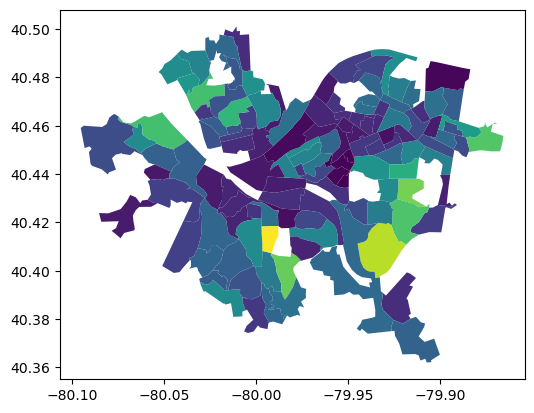

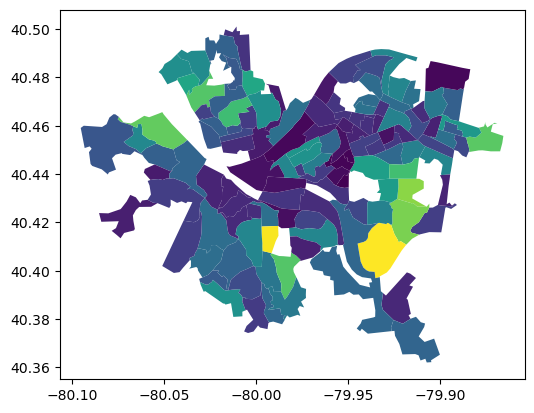

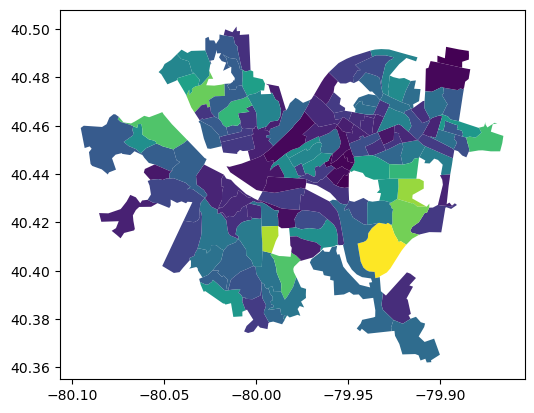

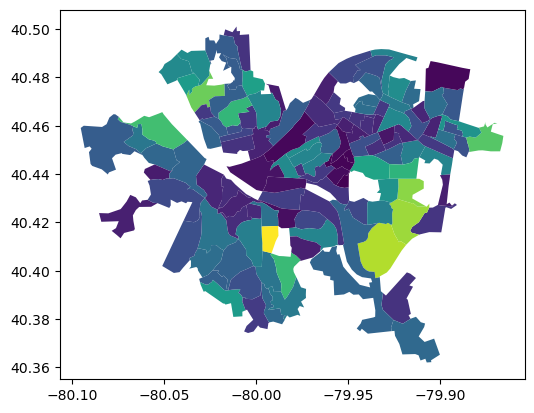

In [83]:
AlCo2016.plot(column='AsthmaDiagnosisAge0to17')
AlCo2017.plot(column='AsthmaDiagnosisAge0to17')
AlCo2018.plot(column='AsthmaDiagnosisAge0to17')
AlCo2019.plot(column='AsthmaDiagnosisAge0to17')

<Axes: >

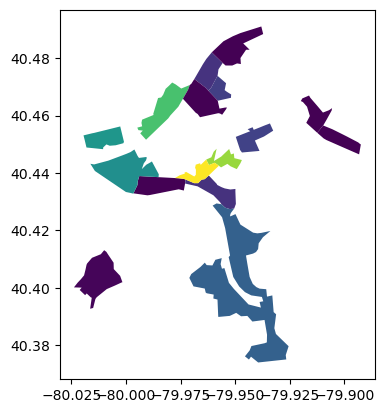

In [84]:
AlCo2016.plot(column='Grand Total')

In [87]:
AlCo2016.columns.to_list()

['FID',
 'STATEFP',
 'COUNTYFP',
 'TRACTCE',
 'AFFGEOID',
 'GEOID',
 'NAME',
 'LSAD',
 'ALAND',
 'AWATER',
 'SHAPE_Length',
 'SHAPE_Area',
 'geometry',
 'Geo_FIPS',
 'YearOfContactDate',
 'TotalPopEst2015_19ACS_x',
 'Age0to17PopEst2015_19ACS_x',
 'AllPrimaryCarePatientsAge0to17',
 'WellChildVisitsInPastYearAge0to17',
 'AsthmaDiagnosisAge0to17',
 'YearOfStartDate',
 'UnderAge1PopEst2015_19ACS',
 'Unique0to17WithED_Visit',
 'NumberED_VisitsAge0to17',
 'NumberLowAcuityED_VisitsAge0to17',
 'NumberAsthmaRelatedED_Visits',
 'NumberED_VisitsByChildrenUnder1YearOld',
 'NumberOfInjuryRelatedVisits',
 'NumberAcuteRespiratoryTractInfectionRelatedED_VisitsAge0to17',
 'Geography',
 'Geographic Area Name_x',
 'Total',
 'Total!!Hispanic or Latino',
 'Total!!Not Hispanic or Latino',
 'Total!!Not Hispanic or Latino!!Population of one race',
 'Total!!Not Hispanic or Latino!!Population of one race!!White alone',
 'Total!!Not Hispanic or Latino!!Population of one race!!Black or African American alone',
 '

In [89]:
swm = pd.read_excel('SWM.xlsx')
AlCo2016['TractNum'] = AlCo['TRACTCE'].astype(int)
swm = AlCo2016[['Grand Total', 'TractNum', 'YearOfContactDate']].merge(swm, how='left', left_on='TractNum', right_on='TRACTINT')
swm['WEIGHTED'] = swm['WEIGHT']*swm['Grand Total']*10
swm = swm[['NID','WEIGHTED']].groupby('NID').sum()
test = AlCo2016.merge(swm, how ='left', left_on='TractNum', right_on='NID')
test = test.fillna(0)
test['WEIGHTED_SUM'] = test['WEIGHTED'] + test['Grand Total']
test= test.fillna(0)

/opt/anaconda3/lib/python3.12/site-packages/openpyxl/worksheet/header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


<Axes: >

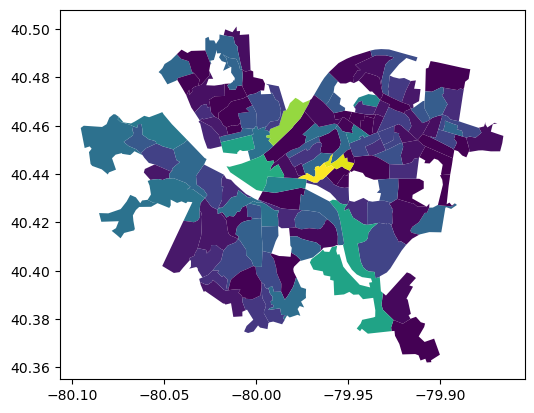

In [90]:
test.plot(column='WEIGHTED_SUM')

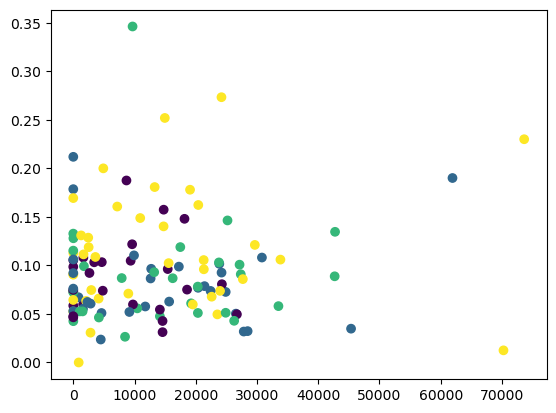

In [93]:
plt.scatter(test['WEIGHTED_SUM'], test['AsthmaDiagnosisAge0to17']/test['Age0to17PopEst2015_19ACS_x'], c=test['High_Prev'])

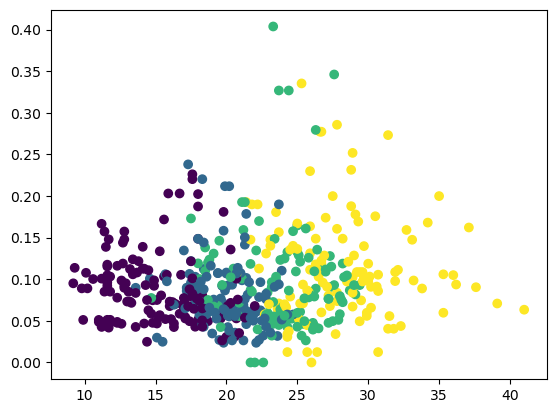

In [101]:
plt.scatter(cityData['CSMOKING_CrudePrev'], cityData['AsthmaDiagnosisAge0to17']/cityData['Age0to17PopEst2015_19ACS_x'], c = cityData['High_Prev'])

In [113]:
placesData = pd.read_csv('PLACES__Census_Tract_Data__GIS_Friendly_Format___2020_release_20250417.csv')
placesData = placesData[placesData['CountyName']=='Allegheny']
placesData

,StateAbbr,StateDesc,CountyName,CountyFIPS,TractFIPS,TotalPopulation,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ARTHRITIS_CrudePrev,ARTHRITIS_Crude95CI,...,OBESITY_Crude95CI,PHLTH_CrudePrev,PHLTH_Crude95CI,SLEEP_CrudePrev,SLEEP_Crude95CI,STROKE_CrudePrev,STROKE_Crude95CI,TEETHLOST_CrudePrev,TEETHLOST_Crude95CI,Geolocation
54819,PA,Pennsylvania,Allegheny,42003,42003010300,6600,15.0,"(11.4, 20.1)",12.9,"(12.1, 13.6)",...,"(33.3, 37.1)",11.9,"(10.5, 13.5)",44.5,"(42.1, 46.6)",1.9,"( 1.8, 2.1)",28.2,"(22.3, 35.3)",POINT (-79.9850601 40.43578591)
54820,PA,Pennsylvania,Allegheny,42003,42003020100,3629,7.3,"( 5.9, 9.2)",17.7,"(17.0, 18.5)",...,"(25.5, 28.2)",8.1,"( 7.1, 9.3)",35.8,"(33.7, 37.9)",2.0,"( 1.9, 2.2)",9.4,"( 7.0, 12.4)",POINT (-79.9995746 40.44091316)
54821,PA,Pennsylvania,Allegheny,42003,42003020300,616,5.0,"( 4.3, 6.4)",16.1,"(15.5, 16.9)",...,"(25.3, 27.3)",6.1,"( 5.6, 7.0)",34.2,"(32.6, 35.8)",1.4,"( 1.3, 1.5)",4.6,"( 3.3, 6.6)",POINT (-79.98156718 40.45420531)
54822,PA,Pennsylvania,Allegheny,42003,42003030500,2256,15.5,"(13.0, 18.4)",37.0,"(35.7, 38.5)",...,"(44.8, 47.9)",20.5,"(18.3, 22.9)",47.7,"(46.1, 49.3)",7.6,"( 6.7, 8.6)",30.6,"(20.3, 40.1)",POINT (-79.98380551 40.44275023)
54823,PA,Pennsylvania,Allegheny,42003,42003040200,2604,12.7,"( 9.4, 17.4)",17.4,"(16.5, 18.2)",...,"(30.4, 35.4)",12.7,"(10.8, 14.6)",42.6,"(39.1, 45.8)",2.9,"( 2.6, 3.2)",25.2,"(17.6, 33.9)",POINT (-79.96632693 40.44011702)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55206,PA,Pennsylvania,Allegheny,42003,42003564500,3203,8.3,"( 7.2, 9.5)",30.3,"(29.4, 31.2)",...,"(31.6, 33.6)",12.7,"(11.6, 13.5)",37.2,"(35.9, 38.0)",3.3,"( 3.1, 3.5)",12.7,"( 9.8, 15.8)",POINT (-79.9224362 40.27319014)
55207,PA,Pennsylvania,Allegheny,42003,42003980000,540,7.6,"( 6.1, 9.7)",23.9,"(22.6, 25.1)",...,"(28.6, 31.2)",10.0,"( 9.1, 11.0)",37.1,"(35.8, 39.0)",2.5,"( 2.2, 3.0)",10.1,"( 5.6, 20.2)",POINT (-79.89220603 40.48868878)
55208,PA,Pennsylvania,Allegheny,42003,42003980900,1797,20.4,"(17.5, 23.7)",16.6,"(15.7, 17.5)",...,"(41.5, 43.5)",13.3,"(12.4, 15.3)",49.3,"(48.4, 50.5)",2.6,"( 2.3, 2.9)",22.9,"(14.3, 33.5)",POINT (-80.04165759 40.46660221)
55209,PA,Pennsylvania,Allegheny,42003,42003981800,461,15.2,"(11.7, 19.6)",39.7,"(37.6, 41.2)",...,"(33.9, 37.8)",20.9,"(18.7, 23.9)",39.7,"(37.6, 42.0)",10.1,"( 8.4, 12.1)",32.7,"(22.5, 45.1)",POINT (-79.89724434 40.48063829)


In [117]:
test = AlCo.merge(placesData, how='left', left_on='Geo_FIPS', right_on='TractFIPS')
test

,FID,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,...,OBESITY_Crude95CI,PHLTH_CrudePrev,PHLTH_Crude95CI,SLEEP_CrudePrev,SLEEP_Crude95CI,STROKE_CrudePrev,STROKE_Crude95CI,TEETHLOST_CrudePrev,TEETHLOST_Crude95CI,Geolocation
0,1,42,003,050900,1400000US42003050900,42003050900,509,CT,452643.0,4114.0,...,"(51.5, 54.1)",25.5,"(23.8, 28.8)",53.0,"(51.7, 54.5)",9.1,"( 8.2, 10.0)",44.2,"(35.3, 53.7)",POINT (-79.97441282 40.45106121)
1,2,42,003,070300,1400000US42003070300,42003070300,703,CT,428546.0,0.0,...,"(23.9, 26.9)",7.8,"( 7.0, 8.9)",34.6,"(32.8, 36.6)",2.1,"( 1.9, 2.4)",9.1,"( 5.5, 14.7)",POINT (-79.93521941 40.45079088)
2,3,42,003,120700,1400000US42003120700,42003120700,1207,CT,514927.0,0.0,...,"(48.9, 51.4)",23.8,"(21.6, 26.1)",50.0,"(48.6, 51.5)",9.7,"( 8.7, 11.1)",36.2,"(26.5, 46.6)",POINT (-79.90390431 40.45949668)
3,4,42,003,140400,1400000US42003140400,42003140400,1404,CT,834995.0,0.0,...,"(25.7, 27.1)",7.5,"( 7.0, 8.3)",31.3,"(30.3, 32.2)",2.1,"( 2.0, 2.3)",4.3,"( 3.2, 6.3)",POINT (-79.91574661 40.44935699)
4,5,42,003,180700,1400000US42003180700,42003180700,1807,CT,393380.0,0.0,...,"(32.4, 35.1)",12.0,"(10.6, 13.2)",39.9,"(37.5, 42.3)",2.8,"( 2.5, 3.1)",15.5,"(10.6, 21.7)",POINT (-80.00129536 40.42461824)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,398,42,003,141000,1400000US42003141000,42003141000,1410,CT,507878.0,0.0,...,"(25.1, 27.4)",7.5,"( 6.6, 9.9)",32.2,"(30.6, 34.1)",2.0,"( 1.8, 2.3)",4.9,"( 3.0, 8.2)",POINT (-79.89747476 40.43281419)
398,399,42,003,202300,1400000US42003202300,42003202300,2023,CT,2532255.0,0.0,...,"(27.3, 29.5)",10.5,"( 9.4, 12.1)",35.6,"(33.9, 37.4)",2.9,"( 2.5, 3.2)",11.3,"( 6.8, 17.7)",POINT (-80.03940885 40.41017918)
399,400,42,003,320600,1400000US42003320600,42003320600,3206,CT,1479651.0,0.0,...,"(30.1, 32.6)",11.2,"( 9.9, 12.5)",37.0,"(35.3, 38.4)",2.9,"( 2.6, 3.1)",11.0,"( 7.0, 15.7)",POINT (-80.0051169 40.3946473)
400,401,42,003,408001,1400000US42003408001,42003408001,4080.01,CT,26224976.0,0.0,...,"(28.2, 30.1)",10.9,"(10.0, 11.6)",33.6,"(32.2, 35.2)",3.2,"( 2.9, 3.7)",9.4,"( 6.1, 13.9)",POINT (-79.95920575 40.65268583)


<Axes: >

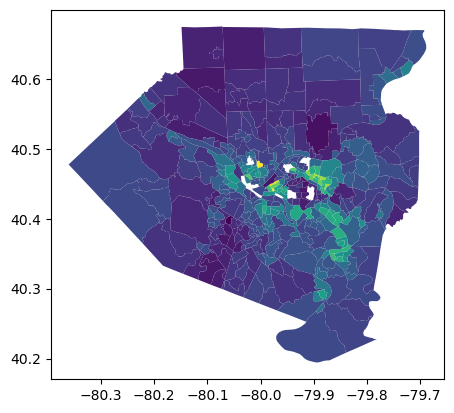

In [121]:
test.plot(column='CASTHMA_CrudePrev')

In [123]:
test.to_csv('validation.csv')